<a href="https://colab.research.google.com/github/jeonghoya/Machine-Learning-Programming/blob/main/week6/eda_pulseDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os # <--- FIX 1: 'os' 모듈을 import 합니다.

In [ ]:
def analyze_patient_blood_pressure(file_path):
    """
    선택한 환자 파일의 혈압 데이터를 분석하고 시각화합니다.
    - 최대 2000개 세그먼트의 SBP, DBP 변동을 그래프로 표시합니다.
    - SBP, DBP 값의 분포를 히스토그램으로 보여주고, 권장 범위 충족 비율을 계산합니다.
    """
    print(f"'{file_path}' 파일 분석을 시작합니다...")

    try:
        with h5py.File(file_path, 'r') as f:
            if 'Subj_Wins' not in f or 'SegSBP' not in f['Subj_Wins']:
                print("오류: 파일이 유효한 PulseDB 형식이 아닙니다.")
                return

            # 1. 데이터 로딩 (최대 2000개 세그먼트)
            sbp_refs = f['Subj_Wins']['SegSBP'][0]
            dbp_refs = f['Subj_Wins']['SegDBP'][0]

            num_segments_to_load = min(len(sbp_refs), 2000)

            sbps = np.array([float(f[ref][()][0, 0]) for ref in sbp_refs[:num_segments_to_load]])
            dbps = np.array([float(f[ref][()][0, 0]) for ref in dbp_refs[:num_segments_to_load]])

            print(f"총 {num_segments_to_load}개의 세그먼트를 로드했습니다.")

            # 2. 요구사항: 전 구간 SBP, DBP 그래프 표시
            print("\n요구사항 1: 전체 혈압 변동 그래프를 생성합니다...")
            plt.style.use('seaborn-v0_8-whitegrid')
            plt.figure(figsize=(18, 7))
            plt.plot(sbps, label='SBP (Systolic)', color='red', alpha=0.8, linewidth=1.5)
            plt.plot(dbps, label='DBP (Diastolic)', color='blue', alpha=0.8, linewidth=1.5)
            plt.title(f'Blood Pressure Trend for Patient ({os.path.basename(file_path)})', fontsize=16)
            plt.xlabel('Segment Index', fontsize=12)
            plt.ylabel('Blood Pressure (mmHg)', fontsize=12)
            plt.legend() # <--- FIX 2: 그래프에 범례를 추가합니다.
            plt.show()

            # 3. 요구사항: 혈압 범위 적합성 분석 및 시각화
            print("\n요구사항 2: 혈압 범위 적합성을 분석합니다...")
            avg_sbp = np.mean(sbps)
            avg_dbp = np.mean(dbps)

            # 정상 SBP (90 <= sbp < 130) 비율 계산
            sbp_in_range_pct = np.mean((sbps >= 90) & (sbps < 130)) * 100
            # 정상 DBP (60 <= dbp < 80) 비율 계산
            dbp_in_range_pct = np.mean((dbps >= 60) & (dbps < 80)) * 100

            print("\n--- 혈압 통계 요약 ---")
            print(f"  - 평균 SBP: {avg_sbp:.2f} mmHg")
            print(f"  - 평균 DBP: {avg_dbp:.2f} mmHg")
            print(f"  - 정상 SBP (90-130) 비율: {sbp_in_range_pct:.2f}%")
            print(f"  - 정상 DBP (60-80) 비율: {dbp_in_range_pct:.2f}%")

            # 히스토그램 시각화
            fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
            fig.suptitle('Blood Pressure Distribution Analysis', fontsize=16)

            ax1.hist(sbps, bins=30, color='coral', edgecolor='black')
            ax1.axvline(90, color='darkgreen', linestyle='--', label='Normal lower bound (90)')
            ax1.axvline(130, color='darkred', linestyle='--', label='Normal upper bound (130)')
            ax1.set_title('SBP Distribution')
            ax1.set_xlabel('SBP (mmHg)')
            ax1.legend()

            ax2.hist(dbps, bins=30, color='skyblue', edgecolor='black')
            ax2.axvline(60, color='darkgreen', linestyle='--', label='Normal lower bound (60)')
            ax2.axvline(80, color='darkred', linestyle='--', label='Normal upper bound (80)')
            ax2.set_title('DBP Distribution')
            ax2.set_xlabel('DBP (mmHg)')
            ax2.legend()

            plt.show()

            # 최종 추천
            print("\n--- 최종 분석 결과 ---")
            if sbp_in_range_pct > 70 and dbp_in_range_pct > 70:
                print("✅ 이 환자는 정상 혈압 범위 조건을 잘 만족하는 훌륭한 후보입니다.")
            elif sbp_in_range_pct > 50 and dbp_in_range_pct > 50:
                print("⚠️ 이 환자는 어느 정도 조건을 만족하지만, 일부 혈압이 범위를 벗어납니다. 사용 가능합니다.")
            else:
                print("❌ 이 환자는 정상 혈압 범위와 차이가 커 보입니다. 다른 환자를 찾아보는 것을 고려해 보세요.")

    except FileNotFoundError:
        print(f"오류: '{file_path}' 파일을 찾을 수 없습니다. 경로를 확인해주세요.")
    except Exception as e:
        print(f"파일 분석 중 오류가 발생했습니다: {e}")

'/content/drive/MyDrive/Colab Notebooks/p007629.mat' 파일 분석을 시작합니다...
총 2000개의 세그먼트를 로드했습니다.

요구사항 1: 전체 혈압 변동 그래프를 생성합니다...


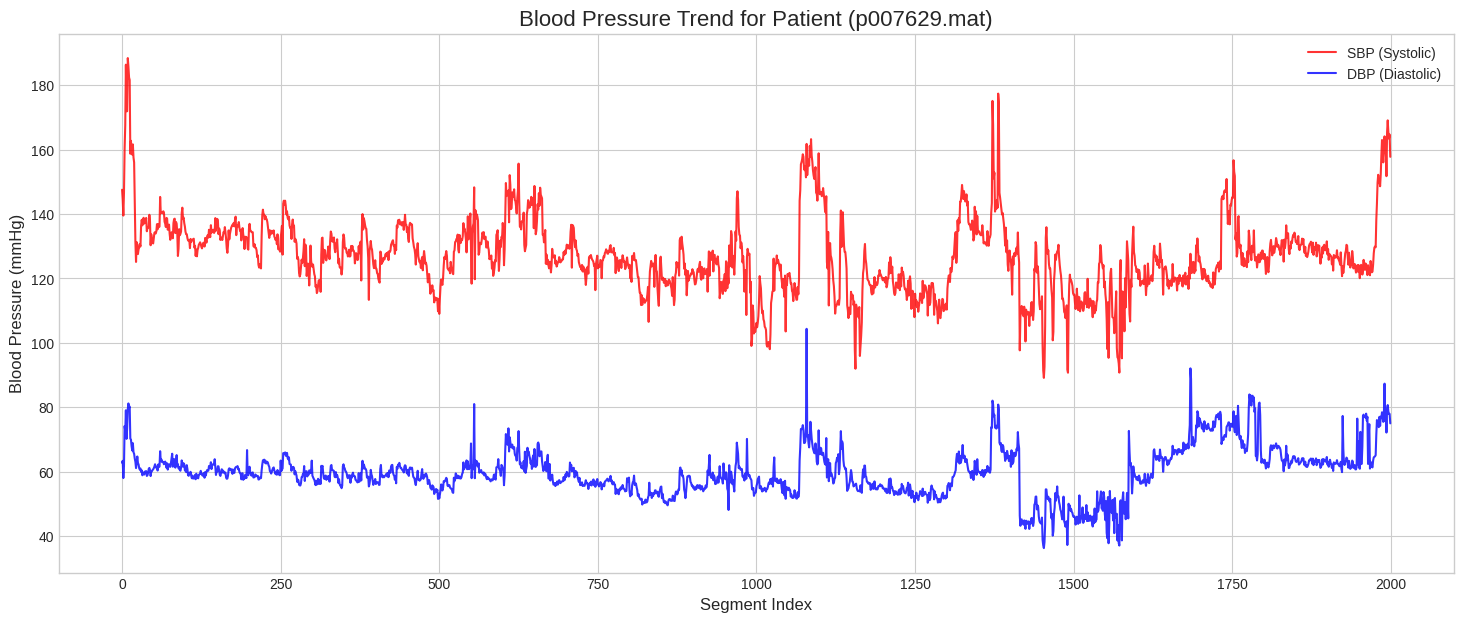


요구사항 2: 혈압 범위 적합성을 분석합니다...

--- 혈압 통계 요약 ---
  - 평균 SBP: 127.00 mmHg
  - 평균 DBP: 59.71 mmHg
  - 정상 SBP (90-130) 비율: 65.25%
  - 정상 DBP (60-80) 비율: 43.60%


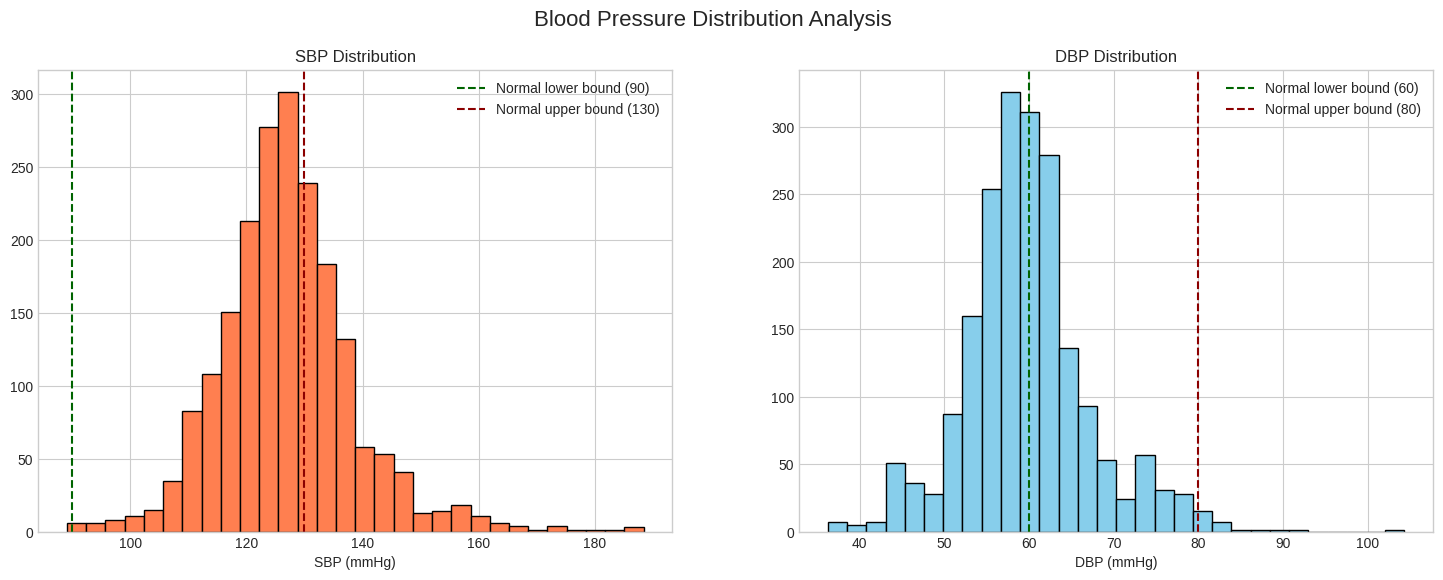


--- 최종 분석 결과 ---
❌ 이 환자는 정상 혈압 범위와 차이가 커 보입니다. 다른 환자를 찾아보는 것을 고려해 보세요.


In [ ]:
# ===== 실행 부분 =====
# 1. 다운로드한 환자 .mat 파일의 전체 경로를 여기에 입력하세요.
# 예시: PATIENT_FILE_PATH = '/content/PulseDB_MIMIC/p012345.mat'
PATIENT_FILE_PATH = '/content/drive/MyDrive/Colab Notebooks/p044036.mat' # 여기에 본인의 파일 경로를 입력

# 2. 분석 함수 실행
analyze_patient_blood_pressure(PATIENT_FILE_PATH)